In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv("C:\\Users\\kumar\\Downloads\\insurance.csv")

In [3]:
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [4]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [5]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [6]:
 data['region'].value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

<Axes: xlabel='sex', ylabel='count'>

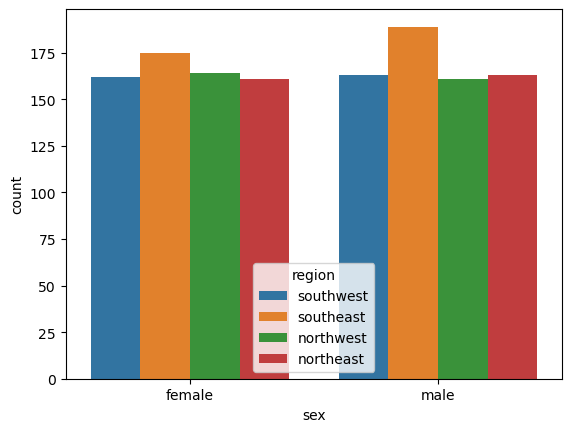

In [7]:
sns.countplot(x=data['sex'] ,hue=data['region'])

<Axes: xlabel='sex', ylabel='count'>

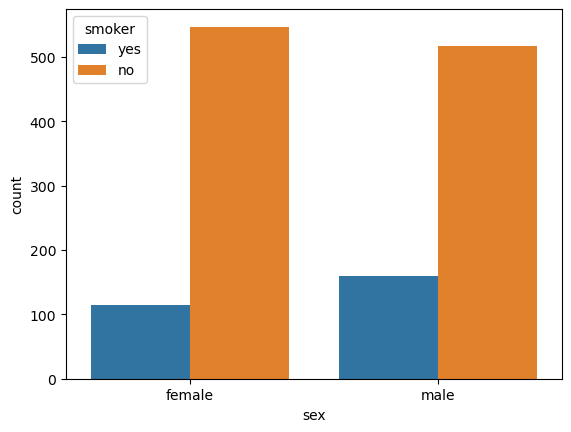

In [8]:
 sns.countplot(x=data['sex'] ,hue=data['smoker'])

<Axes: xlabel='age', ylabel='Count'>

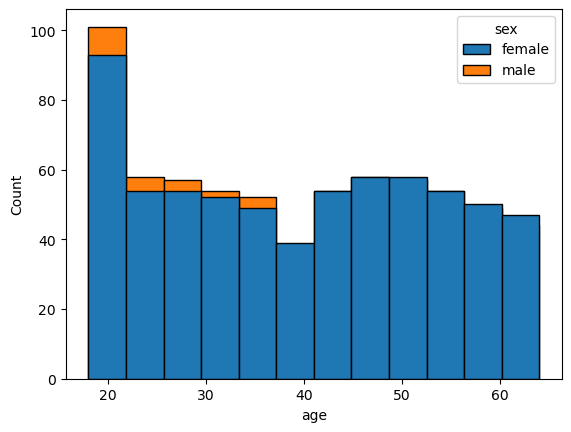

In [9]:
sns.histplot(x=data['age'],hue=data['sex'],alpha=1)

<Axes: xlabel='age', ylabel='Count'>

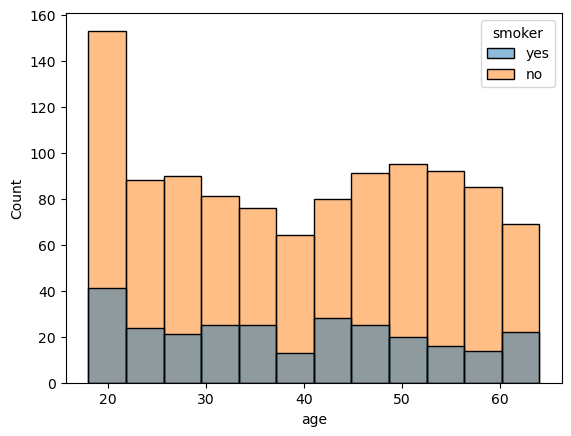

In [10]:
sns.histplot(x=data['age'],hue=data['smoker'],alpha=0.5)

<Axes: xlabel='age', ylabel='children'>

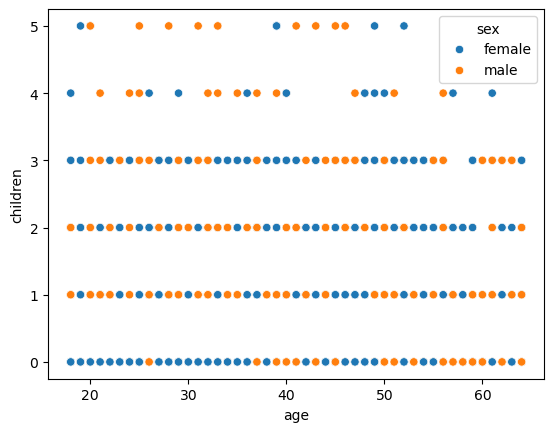

In [11]:
sns.scatterplot(x=data['age'],y=data['children'],hue=data['sex'])

<Axes: >

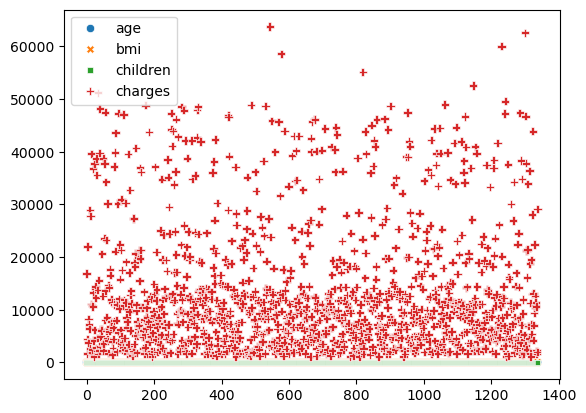

In [12]:
sns.scatterplot(data)

In [13]:
data.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

{'whiskers': [<matplotlib.lines.Line2D at 0x1cd98cb12e0>,
 'caps': [<matplotlib.lines.Line2D at 0x1cd98f7e1b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1cd98f7daf0>],
 'medians': [<matplotlib.lines.Line2D at 0x1cd98f7e780>],
 'fliers': [<matplotlib.lines.Line2D at 0x1cd98f7e9f0>],
 'means': []}

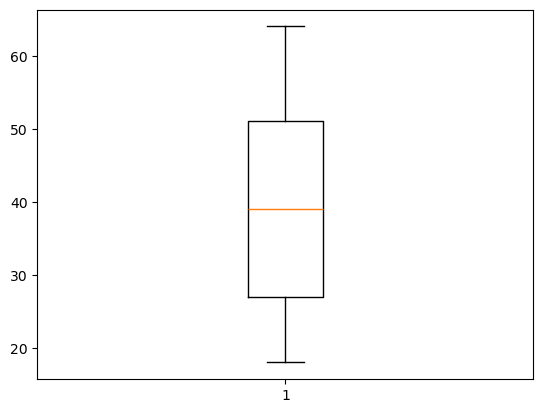

In [14]:
plt.boxplot(data['age'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1cd98fd39e0>,
 'caps': [<matplotlib.lines.Line2D at 0x1cd98fd3e90>,
 'boxes': [<matplotlib.lines.Line2D at 0x1cd98f7cf20>],
 'medians': [<matplotlib.lines.Line2D at 0x1cd99168470>],
 'fliers': [<matplotlib.lines.Line2D at 0x1cd99168740>],
 'means': []}

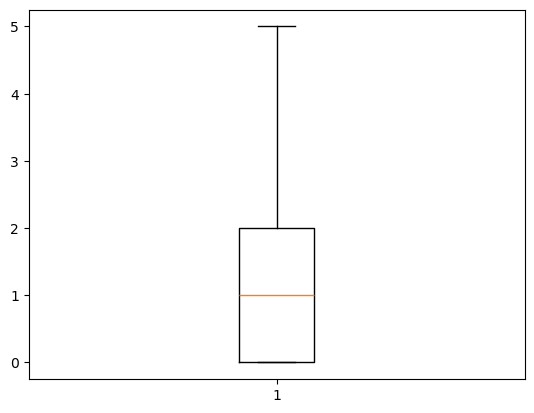

In [15]:
plt.boxplot(data['children'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1cd991ada60>,
 'caps': [<matplotlib.lines.Line2D at 0x1cd991adf10>,
 'boxes': [<matplotlib.lines.Line2D at 0x1cd991ad820>],
 'medians': [<matplotlib.lines.Line2D at 0x1cd991ae3c0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1cd98fb8b60>],
 'means': []}

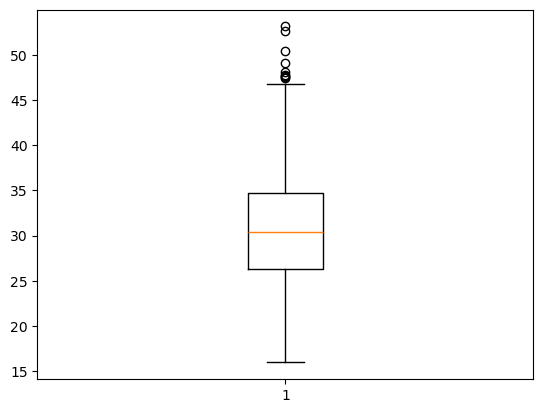

In [16]:
plt.boxplot(data['bmi'])

there are many outliers are avalible in my bmi column

In [18]:
Q1 = data['bmi'].quantile(0.25)
Q3 = data['bmi'].quantile(0.75)
IQR = Q3 - Q1

lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

data['bmi'] = np.where(
    data['bmi'] > upper_limit, upper_limit,
    np.where(data['bmi'] < lower_limit, lower_limit, data['bmi'])
)

{'whiskers': [<matplotlib.lines.Line2D at 0x1cd98ca55b0>,
 'caps': [<matplotlib.lines.Line2D at 0x1cd98ca7b60>,
 'boxes': [<matplotlib.lines.Line2D at 0x1cd98f7fdd0>],
 'medians': [<matplotlib.lines.Line2D at 0x1cd98d48a70>],
 'fliers': [<matplotlib.lines.Line2D at 0x1cd98d4a3f0>],
 'means': []}

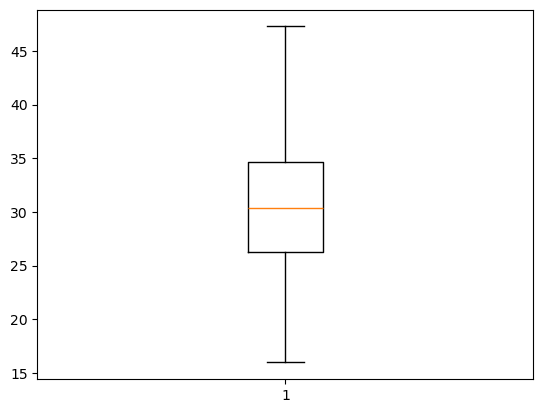

In [19]:
plt.boxplot(data['bmi'])

In [20]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer


In [21]:
categorical_features = ['sex', 'smoker','region']

# Define the ColumnTransformer
ct = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(), categorical_features)
    ],
    remainder='passthrough'   # keep other columns as they are
)

# Transform the dataset
data_transformed = ct.fit_transform(data)

# Convert back to DataFrame for readability
data1 = pd.DataFrame(data_transformed)

print(data1)

       0    1    2    3    4    5    6    7     8       9    10           11
0     1.0  0.0  0.0  1.0  0.0  0.0  0.0  1.0  19.0  27.900  0.0  16884.92400
1     0.0  1.0  1.0  0.0  0.0  0.0  1.0  0.0  18.0  33.770  1.0   1725.55230
2     0.0  1.0  1.0  0.0  0.0  0.0  1.0  0.0  28.0  33.000  3.0   4449.46200
3     0.0  1.0  1.0  0.0  0.0  1.0  0.0  0.0  33.0  22.705  0.0  21984.47061
4     0.0  1.0  1.0  0.0  0.0  1.0  0.0  0.0  32.0  28.880  0.0   3866.85520
...   ...  ...  ...  ...  ...  ...  ...  ...   ...     ...  ...          ...
1333  0.0  1.0  1.0  0.0  0.0  1.0  0.0  0.0  50.0  30.970  3.0  10600.54830
1334  1.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  18.0  31.920  0.0   2205.98080
1335  1.0  0.0  1.0  0.0  0.0  0.0  1.0  0.0  18.0  36.850  0.0   1629.83350
1336  1.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  21.0  25.800  0.0   2007.94500
1337  1.0  0.0  0.0  1.0  0.0  1.0  0.0  0.0  61.0  29.070  0.0  29141.36030

[1338 rows x 12 columns]


In [22]:
data1

,0,1,2,3,4,5,6,7,8,9,10,11
0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,19.0,27.900,0.0,16884.92400
1,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,18.0,33.770,1.0,1725.55230
2,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,28.0,33.000,3.0,4449.46200
3,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,33.0,22.705,0.0,21984.47061
4,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,32.0,28.880,0.0,3866.85520
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,50.0,30.970,3.0,10600.54830
1334,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,18.0,31.920,0.0,2205.98080
1335,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,18.0,36.850,0.0,1629.83350
1336,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,21.0,25.800,0.0,2007.94500


In [23]:
x=data1.drop(columns=11)
y=data1[11]

In [24]:
x

,0,1,2,3,4,5,6,7,8,9,10
0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,19.0,27.900,0.0
1,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,18.0,33.770,1.0
2,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,28.0,33.000,3.0
3,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,33.0,22.705,0.0
4,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,32.0,28.880,0.0
...,...,...,...,...,...,...,...,...,...,...,...
1333,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,50.0,30.970,3.0
1334,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,18.0,31.920,0.0
1335,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,18.0,36.850,0.0
1336,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,21.0,25.800,0.0


In [25]:
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: 11, Length: 1338, dtype: float64

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [27]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [28]:
lr=LinearRegression()

In [29]:
lr.fit(x_train,y_train)

LinearRegression()

In [30]:
pred=lr.predict(x_test)

In [31]:
from sklearn.metrics import r2_score

In [32]:
r2_score(y_test,pred)

0.7826457400009118

In [33]:
import xgboost as xgb

xgb_reg=xgb.XGBRegressor(
    objective='reg:squarederror', 
    n_estimators=400,
    learning_rate=0.01,
    max_depth=3,
    subsample=0.7,random_state=42)


    

In [34]:
xgb_reg.fit(x_train,y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.01, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=400,
             n_jobs=None, num_parallel_tree=None, ...)

In [35]:
ypred=xgb_reg.predict(x_test)
xpred=xgb_reg.predict(x_train)

In [36]:
#r2_score(y_test,ypred)
r2_score(y_train,xpred)

0.8753364300400229

In [37]:
#  try to get best parameters using greadsearch CV
from sklearn.model_selection import GridSearchCV
grid_pram={
    'n_estimators':[100,200,300,400],
    'max_depth':[3,5,7,10],
    'learning_rate':[0.01,0.05,0.1,0.2],
    'subsample':[0.7,0.8,0.5,1.0]
}

grid_search=GridSearchCV(
    estimator=xgb_reg,
    param_grid=grid_pram,
    scoring='r2',
    cv=5,
    n_jobs=-1
)

    


In [38]:
grid_search.fit(x_train,y_train)
print('best_parameter:',grid_search.best_params_)

best_parameter: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 400, 'subsample': 0.7}


In [77]:
from sklearn.model_selection import cross_val_score

In [81]:
r2_score=cross_val_score(
    xgb_reg,x,y,cv=5,scoring='r2')

print('r2 score mean:' ,r2_score.mean())

r2 score mean: 0.8634176543674436


In [85]:
#the xgboost model gives 86.34 % accuracy on the dataset'